In [1]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

sns.set_style('white')

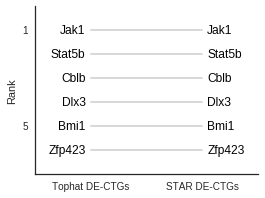

In [3]:
from nbsupport import rank

# Read STAR results.
ctgs_star = (pd.read_csv('../data/processed/sanger/star/ctgs.txt', sep='\t')
               .query('de_pvalue < 0.05')
               .sort_values(by='n_samples', ascending=False))

# Read Tophat results.
ctgs_th = (pd.read_csv('../data/processed/sanger/tophat/ctgs.txt', sep='\t')
             .query('de_pvalue < 0.05')
             .sort_values(by='n_samples', ascending=False))


# Compare DE CTG ranks.
ranks = rank.compare_ranks(ctgs_th, ctgs_star, suffixes=('_tophat', '_star'))

# Plot ranks.
fig, ax = plt.subplots(figsize=(4, 3))
rank.plot_ranks(ranks, rank_a='rank_tophat', 
                rank_b='rank_star', label='gene_name', ax=ax)
ax.set_xticklabels(['Tophat DE-CTGs', 'STAR DE-CTGs']);

fig.savefig('../reports/figures/fig_sx_star_vs_tophat.pdf', bbox_inches='tight')

In [3]:
# Check number of samples per gene.
pd.merge(ctgs_th[['gene_name', 'n_samples']],
         ctgs_star[['gene_name', 'n_samples']],
         on='gene_name', suffixes=['_tophat', '_star'])

,gene_name,n_samples_tophat,n_samples_star
0,Jak1,9,9
1,Stat5b,8,7
2,Cblb,5,5
3,Dlx3,2,2
4,Bmi1,2,2
5,Zfp423,2,2
